In [59]:
import os
import sys
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

In [60]:
sys.path.append('..')
sys.path.append('../src/deeplab/')
from src.deeplab.modeling.deeplab import *

In [61]:
# Load DeepLab model architecture and pretrained weights https://drive.google.com/open?id=1NwcwlWqA-0HqAPk3dSNNPipGMF0iS0Zu
deeplab_model = DeepLab()

checkpoint = torch.load('../trained_models/deeplab-resnet.pth.tar')

deeplab_model.load_state_dict(checkpoint['state_dict'])

print("=> loaded checkpoint '{}' (epoch {})".format('../trained_models/deeplab-resnet.pth.tar', checkpoint['epoch']))

=> loaded checkpoint '../trained_models/deeplab-resnet.pth.tar' (epoch 58)


torch.Size([1, 3, 513, 513])


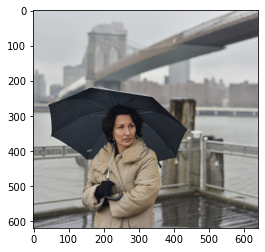

In [62]:
# Load image for testing
# Download the test images from https://farm9.staticflickr.com/8491/8323139585_5bc7f591fa_z.jpg
image = Image.open('..\data\processed\coco_test\coco_test_1.jpg')

plt.imshow(image)

# Transform image to correct input size/normalization and convert to PyTorch Tensor
transformer = transforms.Compose([
            transforms.Resize((513, 513)),
            transforms.ToTensor(), 
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

image = transformer(image).float()

# PyTorch requires a batch size to be set, even if only 1 image is there (1, 3, 513, 513)
image = image.unsqueeze(0)

print(image.shape)

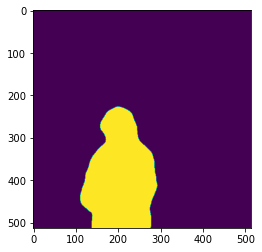

In [63]:
# eval() tells the model that this is inference mode, and will adapt dropout and batchnorm layers accordingly
deeplab_model.eval()

# reduce memory usage and speed up computations by disabling backpropagation
with torch.no_grad():
    predict = deeplab_model(image)
    # Only show the maximum class identified (binary result), default num_classes = 21
    max_pred = torch.argmax(predict, dim=1)
    plt.imshow(max_pred.detach().cpu().squeeze())